In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-data/drug200.csv


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [6]:
data = pd.read_csv('/kaggle/input/drug-data/drug200.csv')

In [7]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
data.shape

(200, 6)

In [17]:
# Checking for missing values in the DataFrame
missing_values = data.isnull()
# Counting the missing values in each column
missing_count = missing_values.sum()
missing_count

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


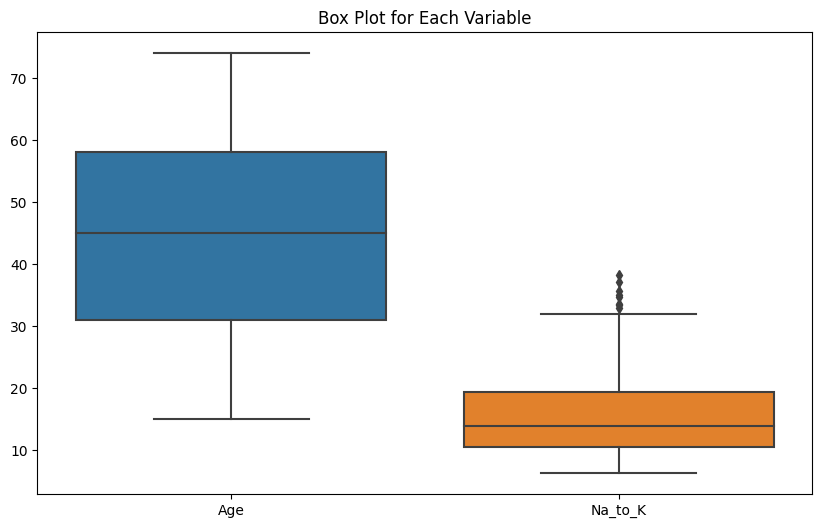

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plot for all columns in the DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot for Each Variable')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


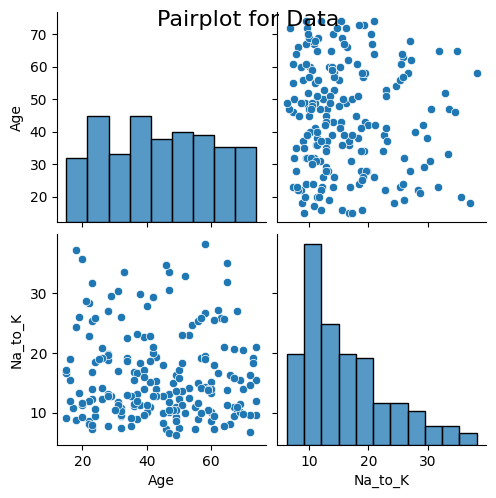

In [19]:
sns.pairplot(data)
plt.suptitle('Pairplot for Data', fontsize=16)
plt.show()

# Categorical variables: Drug, Sex, BP, Cholesterol 

In [39]:
category_Drug = data['Drug'].value_counts() 
category_Drug

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [40]:
category_Drug = data['Drug'].value_counts(normalize=True)
category_Drug

Drug
drugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: proportion, dtype: float64

In [25]:
category_Sex = data['Sex'].value_counts() 
category_Sex

Sex
M    104
F     96
Name: count, dtype: int64

In [31]:
category_Sex = data['Sex'].value_counts(normalize=True)
category_Sex

Sex
M    0.52
F    0.48
Name: proportion, dtype: float64

In [30]:
category_BP_value = data['BP'].value_counts() 
category_BP_value

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [29]:
category_BP = data['BP'].value_counts(normalize=True)
category_BP

BP
HIGH      0.385
LOW       0.320
NORMAL    0.295
Name: proportion, dtype: float64

In [32]:
category_Cholesterol_value = data['Cholesterol'].value_counts() 
category_Cholesterol_value

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [33]:
category_Cholesterol = data['Cholesterol'].value_counts(normalize=True)
category_Cholesterol

Cholesterol
HIGH      0.515
NORMAL    0.485
Name: proportion, dtype: float64

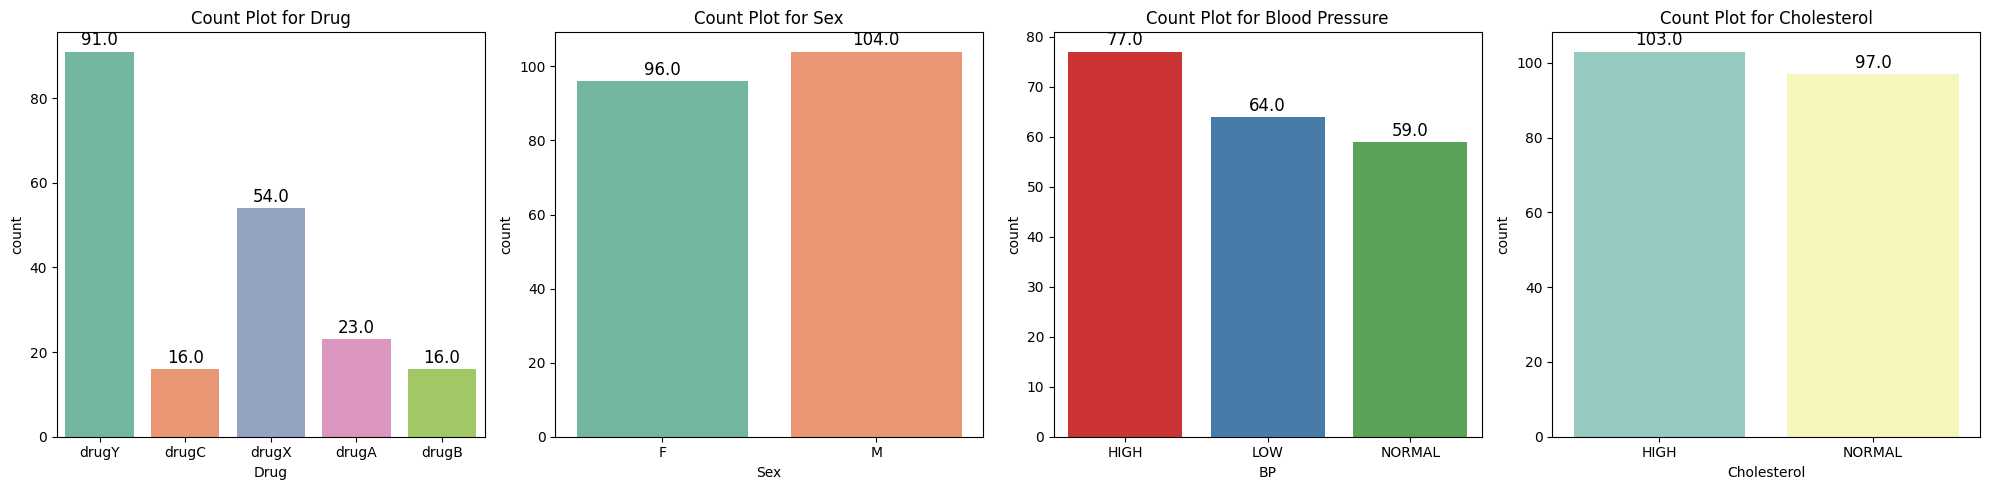

In [51]:

# Set the size of the plot
plt.figure(figsize=(20, 5))  # 1 row, 4 columns

# Plotting the count plot for 'Drug'
plt.subplot(1, 4, 1)  # 1x4 grid, first plot
ax1 = sns.countplot(x='Drug', data=data, palette='Set2')
plt.title('Count Plot for Drug')

# Add count numbers on top of bars for 'Drug'
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Plotting the count plot for 'Sex'
plt.subplot(1, 4, 2)  # 1x4 grid, second plot
ax2 = sns.countplot(x='Sex', data=data, palette='Set2')
plt.title('Count Plot for Sex')

# Add count numbers on top of bars for 'Sex'
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Plotting the count plot for 'BP' (Blood Pressure)
plt.subplot(1, 4, 3)  # 1x4 grid, third plot
ax3 = sns.countplot(x='BP', data=data, palette='Set1')
plt.title('Count Plot for Blood Pressure')

# Add count numbers on top of bars for 'BP'
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Plotting the count plot for 'Cholesterol'
plt.subplot(1, 4, 4)  # 1x4 grid, fourth plot
ax4 = sns.countplot(x='Cholesterol', data=data, palette='Set3')
plt.title('Count Plot for Cholesterol')

# Add count numbers on top of bars for 'Cholesterol'
for p in ax4.patches:
    ax4.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()




In [54]:
# Decision Trees
#label_encoders = {}
#for column in ['Sex', 'BP', 'Cholesterol']:
    #le = LabelEncoder()
    #data[column] = le.fit_transform(data[column])
    #label_encoders[column] = le

In [68]:
# Assuming label_encoders are already fitted, if not, fit them first with training data
label_encoders = {
    'Sex': LabelEncoder().fit(['M', 'F']),  # Fitting on original data for 'Sex'
    'BP': LabelEncoder().fit(['LOW', 'NORMAL', 'HIGH']),  # Fitting for Blood Pressure
    'Cholesterol': LabelEncoder().fit(['NORMAL', 'HIGH'])  # Fitting for Cholesterol
}

In [128]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable (drug names) into numerical labels
y_encoded = label_encoder.fit_transform(y)

# Now `y_encoded` contains numerical labels instead of drug names
print("Encoded labels:", y_encoded)

Encoded labels: [4 2 2 3 4 3 4 2 4 4 2 4 4 4 3 4 3 0 2 4 4 4 4 4 4 4 4 3 4 4 3 1 3 4 3 3 0
 3 3 3 4 1 4 3 3 3 0 2 4 4 4 3 4 4 1 2 1 4 3 4 4 0 4 3 1 4 0 3 4 4 1 4 3 4
 4 4 0 4 0 3 1 3 2 0 2 1 3 4 4 4 4 4 4 4 4 3 4 4 4 4 0 0 2 3 4 3 3 4 1 4 0
 3 3 3 3 4 3 3 0 4 4 4 4 4 1 4 4 3 4 3 4 4 3 4 4 3 1 0 1 3 0 4 1 4 0 3 3 0
 3 2 0 1 3 3 4 2 0 4 2 3 3 1 3 4 4 4 4 3 4 0 3 3 4 4 0 4 0 4 4 4 4 3 3 4 4
 4 1 0 4 4 4 0 4 2 4 2 2 3 3 3]


In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can specify a custom ratio
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of the classes in the resampled training data
print(f'Class distribution after SMOTE: {y_train_resampled.value_counts()}')


Class distribution after SMOTE: Drug
drugX    76
drugY    76
drugC    76
drugA    76
drugB    76
Name: count, dtype: int64


In [129]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Split the data into features (X) and target (y)
X = data.drop(columns=['Drug'])
y = data['Drug']

#  Encode the target variable (y) into numerical labels (y_encoded)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ===================================
# **1. Decision Tree Model**
# ===================================
# Initialize the Decision Tree model with hyperparameters
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, 
                                  min_samples_split=10, min_samples_leaf=4, random_state=42)

# Fit the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions with the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

# Classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Accuracy score for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for Decision Tree: {accuracy_dt:.4f}")

# Cross-validation for Decision Tree
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy for Decision Tree: {cv_scores_dt.mean():.4f}")

Confusion Matrix for Decision Tree:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy for Decision Tree: 1.0000
Cross-validation accuracy for Decision Tree: 0.9938


In [130]:
# Step 7: print the mapping of the encoded labels back to drug names
print("\nDrug to Label Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Drug to Label Mapping:
{'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}


In [131]:
# ===================================
# **2. Random Forest Model**
# ===================================
# Initialize the Random Forest model with hyperparameters
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=5, 
                                  min_samples_split=10, min_samples_leaf=4, max_features='sqrt', random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:")
print(cm_rf)

# Classification report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Accuracy score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.4f}")

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy for Random Forest: {cv_scores_rf.mean():.4f}")


Confusion Matrix for Random Forest:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy for Random Forest: 1.0000
Cross-validation accuracy for Random Forest: 0.9938


## Key Hyperparameters:
max_depth: Limits the depth of the tree to control complexity (avoid overfitting).

min_samples_split: The minimum number of samples required to split an internal node (controls tree growth).

min_samples_leaf: The minimum number of samples required to be at a leaf node (prevents overfitting to small branches).

n_estimators: The number of trees in the Random Forest.

max_features: The number of features to consider when looking for the best split in Random Forest (can help reduce overfitting).

In [132]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features (X) and target (y)
X = data.drop(columns=['Drug'])
y = data['Drug']

#  Encode the target variable (y) into numerical labels (y_encoded)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost model with parameters for overfitting and imbalance handling
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy for XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00        15

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

Accuracy for XGBoost: 0.9750


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:15:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Summary of Results:
Decision Tree:

Accuracy: 1.0000 (perfect on test set)
Cross-validation accuracy: 0.9938 (slightly lower, indicating minimal overfitting)
Classification report: Precision, recall, and F1-score all 1.00 for all classes.
Random Forest:

Accuracy: 1.0000
Cross-validation accuracy: 0.9938 (similar to Decision Tree)
Classification report: Precision, recall, and F1-score all 1.00 for all classes.
XGBoost:

Accuracy: 0.9750 (slightly lower than Decision Tree and Random Forest)
Classification report: Precision 1.00 for most classes, but recall for class 2 is 0.80, indicating some misclassification.
Conclusion:
While all models show excellent performance on the test set (accuracy near 100%), the slight drop in cross-validation accuracy and minor misclassification (class 2 in XGBoost) suggests overfitting. More data could help improve generalization and reduce overfitting, especially for underrepresented classes.


Although all models perform exceptionally well on the test set (with near-perfect accuracy), the slight dip in cross-validation accuracy and a small misclassification in class 2 (for XGBoost) indicate potential overfitting. Adding more data, particularly for underrepresented classes, could help the models generalize better and reduce overfitting.




In [136]:
# Assuming you have already trained your Random Forest model (rf_model)

import pandas as pd

# New patient's data (example metrics)
new_patient = pd.DataFrame([[45, 
                             label_encoders['Sex'].transform(['M'])[0],  # Encoded Sex (M -> 1)
                             label_encoders['BP'].transform(['HIGH'])[0],  # Encoded BP (HIGH -> 0)
                             label_encoders['Cholesterol'].transform(['HIGH'])[0],  # Encoded Cholesterol (HIGH -> 0)
                             15.5]],  # Sodium-to-Potassium ratio
                           columns=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

# Predict the drug prescription for the new patient
predicted_drug = rf_model.predict(new_patient)  # This will return the predicted class label (drug)
predicted_drug


array([4])

In [147]:
# Decode the predicted drug label
predicted_drug_label = label_encoder.inverse_transform(predicted_drug)

# Output the decoded drug name
print(f"Predicted Drug Prescription: {predicted_drug_label[0]}")



Predicted Drug Prescription: drugY
